In [40]:
import pandas as pd
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [10]:
dataset

,Lands,Land_location,Land_area,Special_location,Soil_type,Utilities_Availability,Pollution,Land_price
0,Land_1,New Capital City,383.0,Yes,Gravel,Yes,Low,30000000
1,Land_2,New Capital City,384.0,Yes,Gravel,Yes,Low,30000001
2,Land_3,New Capital City,385.0,Yes,Gravel,Yes,Low,30000002
3,Land_4,New Capital City,386.0,Yes,Gravel,Yes,Low,30000003
4,Land_5,New Capital City,387.0,Yes,Gravel,Yes,Low,30000004
...,...,...,...,...,...,...,...,...
1995,Land_1996,Badr City,420.0,Yes,Gravel,Yes,Low,10000000
1996,Land_1997,Badr City,421.0,Yes,Gravel,Yes,Low,10000001
1997,Land_1998,Badr City,422.0,Yes,Gravel,Yes,Low,10000002
1998,Land_1999,Badr City,423.0,Yes,Gravel,Yes,Low,10000003


In [14]:
dataset = pd.read_csv('Cleaned_Lands.csv')
X = dataset.drop(columns=['Lands', 'Land_price'])
y = dataset['Land_price']

print(X)
print("***********************************************************************")
print(y)

         Land_location  Land_area Special_location Soil_type  \
0     New Capital City      383.0              Yes    Gravel   
1     New Capital City      384.0              Yes    Gravel   
2     New Capital City      385.0              Yes    Gravel   
3     New Capital City      386.0              Yes    Gravel   
4     New Capital City      387.0              Yes    Gravel   
...                ...        ...              ...       ...   
1995         Badr City      420.0              Yes    Gravel   
1996         Badr City      421.0              Yes    Gravel   
1997         Badr City      422.0              Yes    Gravel   
1998         Badr City      423.0              Yes    Gravel   
1999         Badr City      424.0              Yes    Gravel   

     Utilities_Availability Pollution  
0                       Yes       Low  
1                       Yes       Low  
2                       Yes       Low  
3                       Yes       Low  
4                       Yes    

In [33]:
X = dataset.drop(columns=['Lands', 'Land_price'])
y = dataset['Land_price']

categorical_features = ['Land_location', 'Special_location', 'Soil_type', 'Utilities_Availability', 'Pollution']
numerical_features = ['Land_area']

ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features)
    ],
    remainder='passthrough'
)

X_encoded = ct.fit_transform(X)

In [34]:
print(X_encoded)

[[  0.   0.   0. ...   1.   0. 383.]
 [  0.   0.   0. ...   1.   0. 384.]
 [  0.   0.   0. ...   1.   0. 385.]
 ...
 [  0.   1.   0. ...   1.   0. 422.]
 [  0.   1.   0. ...   1.   0. 423.]
 [  0.   1.   0. ...   1.   0. 424.]]


In [35]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [36]:
y_train = y_train.astype(float)

In [37]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [38]:
y_pred_tr = model.predict(X_train)
y_pred = model.predict(X_test)
error_tr = np.sqrt(mean_squared_error(y_train, y_pred_tr))
error_test = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE for train = ',error_tr)
print('RMSE for test = ',error_test)

RMSE for train =  200157349.80320567
RMSE for test =  303212422.7594079


In [41]:
r2_train = r2_score(y_train, y_pred_tr)
r2_test = r2_score(y_test, y_pred)

print('R2 for train = ', r2_train)
print('R2 for test = ', r2_test)

R2 for train =  0.05263179476022728
R2 for test =  0.07200666425378655


In [45]:
#Trying Random Forest Regression

In [43]:
from sklearn.ensemble import RandomForestRegressor

In [44]:
ct = ColumnTransformer(
    transformers=[
        ('encoder', OneHotEncoder(), categorical_features),
        ('scaler', StandardScaler(), numerical_features)
    ],
    remainder='passthrough'
)

In [46]:
X_encoded = ct.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [47]:
model = RandomForestRegressor()

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

best_model.fit(X_train, y_train)

RandomForestRegressor(min_samples_split=5, n_estimators=200)

In [48]:
y_train_pred = best_model.predict(X_train)
y_test_pred = best_model.predict(X_test)

In [51]:
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'R2 For Train: {train_r2}')
print(f'R2 For Test: {test_r2}')

Train RMSE: 358524.78189403616
Test RMSE: 719744.1997192198
R2 For Train: 0.9999969604164771
R2 For Test: 0.9999947711374764


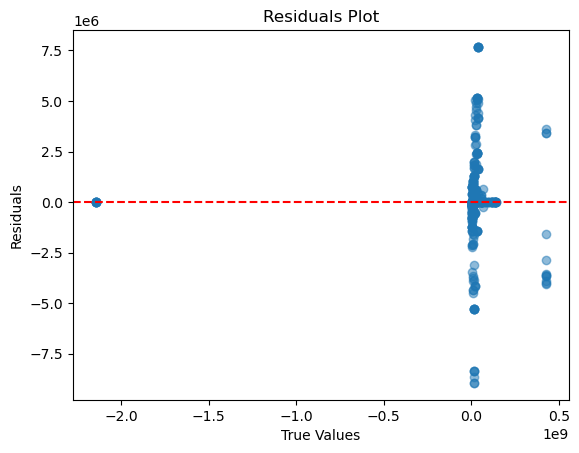

In [58]:
import matplotlib.pyplot as plt

residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


In [86]:
#Many Outliers

In [68]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt

In [78]:
# Assume X and y are your features and target variable
categorical_columns = ['Land_location', 'Soil_type', 'Pollution']
binary_columns = ['Special_location', 'Utilities_Availability']
numeric_columns = ['Land_area']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [79]:
# Preprocessing for numeric features
numeric_imputer = SimpleImputer(strategy='mean')
X_train_numeric = numeric_imputer.fit_transform(X_train[numeric_columns])
X_test_numeric = numeric_imputer.transform(X_test[numeric_columns])

scaler = StandardScaler()
X_train_numeric = scaler.fit_transform(X_train_numeric)
X_test_numeric = scaler.transform(X_test_numeric)

# Preprocessing for binary features
binary_imputer = SimpleImputer(strategy='most_frequent')
X_train_binary = binary_imputer.fit_transform(X_train[binary_columns])
X_test_binary = binary_imputer.transform(X_test[binary_columns])

binary_encoder = OrdinalEncoder()
X_train_binary = binary_encoder.fit_transform(X_train_binary)
X_test_binary = binary_encoder.transform(X_test_binary)

# Preprocessing for categorical features
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_categorical = categorical_imputer.fit_transform(X_train[categorical_columns])
X_test_categorical = categorical_imputer.transform(X_test[categorical_columns])

onehot_encoder = OneHotEncoder(handle_unknown='ignore')
X_train_categorical = onehot_encoder.fit_transform(X_train_categorical).toarray()
X_test_categorical = onehot_encoder.transform(X_test_categorical).toarray()

# Preprocessing for ordinal features
ordinal_imputer = SimpleImputer(strategy='most_frequent')
X_train_pollution = ordinal_imputer.fit_transform(X_train[['Pollution']])
X_test_pollution = ordinal_imputer.transform(X_test[['Pollution']])

ordinal_encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High']])
X_train_pollution = ordinal_encoder.fit_transform(X_train_pollution)
X_test_pollution = ordinal_encoder.transform(X_test_pollution)

In [80]:
# Combine all preprocessed features
X_train_preprocessed = np.hstack([X_train_numeric, X_train_binary, X_train_categorical, X_train_pollution])
X_test_preprocessed = np.hstack([X_test_numeric, X_test_binary, X_test_categorical, X_test_pollution])

In [81]:
# Train the model
model = LinearRegression()
model.fit(X_train_preprocessed, y_train)

LinearRegression()

In [82]:
# Predictions
y_train_pred = model.predict(X_train_preprocessed)
y_test_pred = model.predict(X_test_preprocessed)

In [84]:
# Evaluate RMSE and R²
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')
print(f'Train R2 Score: {train_r2}')
print(f'Test R2 Score: {test_r2}')

Train RMSE: 0.5769061010704389
Test RMSE: 0.595626061849134
Train R2 Score: 0.7216909198960226
Test R2 Score: 0.7059419950932031


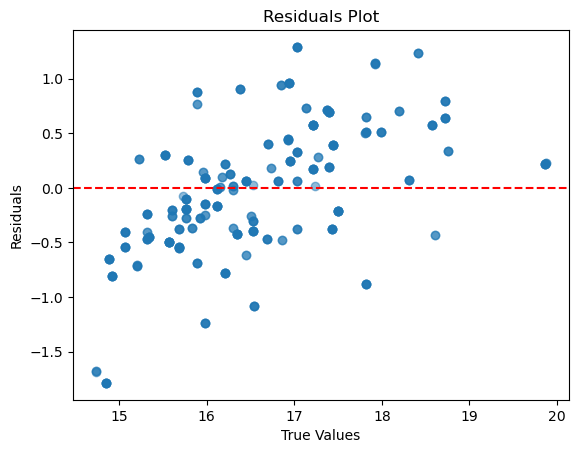

In [85]:
# Residuals Plot
residuals = y_test - y_test_pred
plt.scatter(y_test, residuals, alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('True Values')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()
